In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Date time conversion registration
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

%matplotlib inline

In [25]:
# index has to be uniques values
df_c = pd.read_excel('C:/capes_sql/riuada/aca_cabals_2010_2019.xlsx',                                     
                                    skiprows=[0,1,2,3,4,5,6],
                                    parse_dates=['Data'],                                     
                                     )
df_c = df_c.drop(columns=['Unnamed: 0','Unnamed: 3','Unnamed: 5','Unnamed: 11']) 

In [26]:
df_c.head(3)

,Data,Estació,Conca,UTM X,UTM Y,Variable,Mitjana,Unitat Mesura
0,2010-01-01,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.130181,m³/s
1,2010-01-01,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Nivell riu Francoli,0.105094,m
2,2010-01-02,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.130000,m³/s


### Drop height values          

In [27]:
# get names of indexes for which
height = df_c[ df_c['Unitat Mesura'] == 'm' ].index

In [28]:
df_c.drop(height, inplace = True)
df_c.tail()

,Data,Estació,Conca,UTM X,UTM Y,Variable,Mitjana,Unitat Mesura
6593,2019-10-19,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.037600,m³/s
6595,2019-10-20,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.064600,m³/s
6597,2019-10-21,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.064417,m³/s
6599,2019-10-22,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,1.252800,m³/s
6601,2019-10-23,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.000000,m³/s


### Data avaluation

In [29]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3302 entries, 0 to 6601
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           3302 non-null   datetime64[ns]
 1   Estació        3302 non-null   object        
 2   Conca          3302 non-null   object        
 3   UTM X          3302 non-null   int64         
 4   UTM Y          3302 non-null   int64         
 5   Variable       3302 non-null   object        
 6   Mitjana        3302 non-null   float64       
 7   Unitat Mesura  3302 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 232.2+ KB


In [30]:
df_c.describe()

,UTM X,UTM Y,Mitjana
count,3302.0,3302.0,3302.000000
mean,347766.0,4580851.0,0.293488
std,0.0,0.0,0.579239
min,347766.0,4580851.0,0.000000
25%,347766.0,4580851.0,0.070115
50%,347766.0,4580851.0,0.143259
75%,347766.0,4580851.0,0.334146
max,347766.0,4580851.0,15.663038


In [31]:
#count no null values
df_c.dropna().count()

Data             3302
Estació          3302
Conca            3302
UTM X            3302
UTM Y            3302
Variable         3302
Mitjana          3302
Unitat Mesura    3302
dtype: int64

In [32]:
#count values
len(df_c)

3302

In [33]:
#data as index
df_c = df_c.set_index('Data')
df_c.head(2)

,Estació,Conca,UTM X,UTM Y,Variable,Mitjana,Unitat Mesura
Data,,,,,,,
2010-01-01,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.130181,m³/s
2010-01-02,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.130000,m³/s


## Plot the data

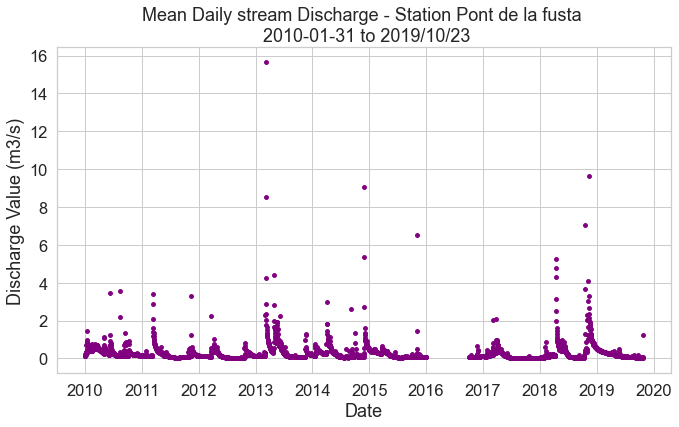

In [35]:
# Plot using matplotlib
fig, ax = plt.subplots(figsize=(11, 6))

ax.scatter(x=df_c.index,
           y=df_c["Mitjana"],
           marker="o",# o points x x marks
           s=15,#size markers
           color="purple",
           )

ax.set(xlabel="Date", ylabel="Discharge Value (m3/s)",
       title="Mean Daily stream Discharge - Station Pont de la fusta \n 2010-01-31 to 2019/10/23")

plt.show()